In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import gdown
from IPython.display import clear_output

id = '1I1cxPmG8COgq85qVkyUadlQY5eiQo2HD'
url = 'https://drive.google.com/uc?id={}'.format(id)
output = 'train.csv'

gdown.download(url, output, quiet=False)
clear_output()

In [3]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

<AxesSubplot:>

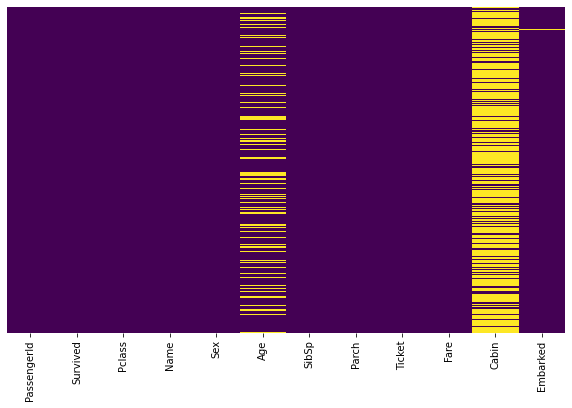

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

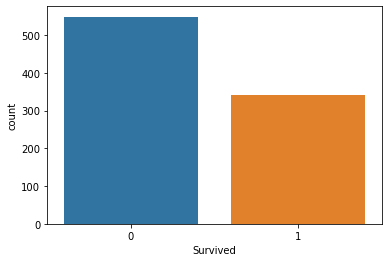

In [7]:
sns.countplot(x='Survived', data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

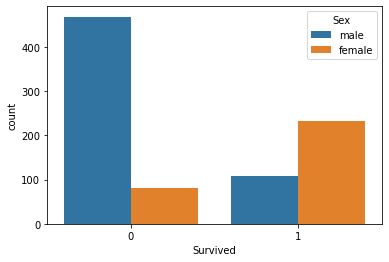

In [8]:
sns.countplot(x='Survived', hue='Sex', data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

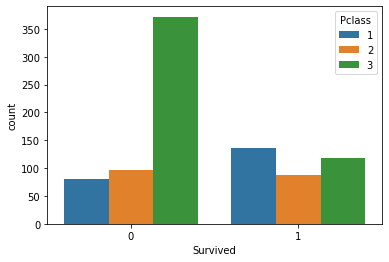

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=data)

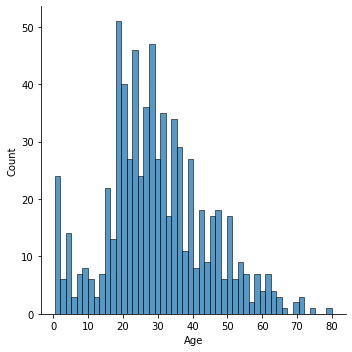

In [10]:
sns.displot(data['Age'].dropna(), bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

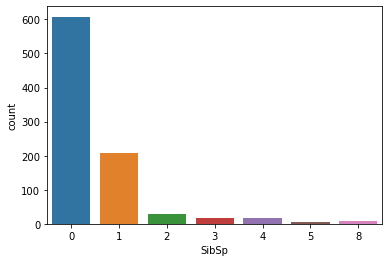

In [11]:
sns.countplot(x='SibSp', data=data)

## Data Cleaning 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

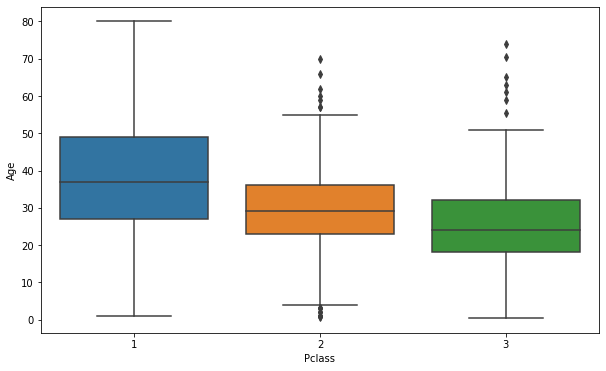

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=data)

In [13]:
def age_cal(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
data['Age'] = data[['Age', 'Pclass']].apply(age_cal, axis=1)

<AxesSubplot:>

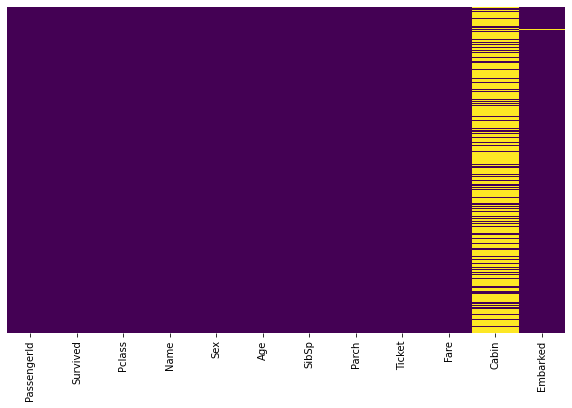

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
data.drop('Cabin', axis=1, inplace=True)

In [17]:
data.dropna(inplace=True)

## Converting Categorical Features 

In [18]:
categorical_feat = ['Pclass', 'Sex', 'Embarked']

data = pd.get_dummies(data, columns=categorical_feat, drop_first=True)
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1


## Training Logistic Regression Model 

In [19]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = data['Survived']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

clear_output()

## Model Evaluation 

In [22]:
print('Intercept: \n', model.intercept_)
print('Coefficient: \n', model.coef_)

Intercept: 
 [3.24589831]
Coefficient: 
 [[-0.02709793 -0.23382134 -0.17431008  0.00312458 -0.5847733  -1.80117545
  -2.49557077  0.0999206  -0.48279451]]


In [23]:
y_predict = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       107
           1       0.84      0.65      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178

[[98  9]
 [25 46]]


## DONE 